In [1]:
import arviz as az
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('arviz-darkgrid')

In [2]:
train_df, test_df = pd.read_excel('train_2.xlsx'), pd.read_csv('test_2.csv')
train_df.insert(0, "Intercept", [1, ]*train_df.shape[0], True)
test_df.insert(0, "Intercept", [1, ]*test_df.shape[0], True)

In [3]:
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].astype("category").cat.codes.values[..., None]

In [4]:
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].astype("category").cat.codes.values[..., None]

In [5]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [6]:
def cost(X, weights, y):
    m = len(y)
    h = sigmoid(X @ weights)
    step_1 = y.T @ np.log(h)
    step_2 = (1-y).T @ np.log(1-h)
    return -(step_1+step_2).squeeze() / m

In [7]:
def plot_cost(cost_list):
    plt.plot(cost_list)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost function')
    plt.show()

In [8]:
def predict(X, y, weights, df, part):
    predictions = np.round(sigmoid(X @ weights)) == y
    accuracy = np.sum(predictions)/len(y) * 100
    print(f"Accuracy for {df} set {part}: {accuracy:.3f} %")

In [9]:
# Part 1
def gradient_descent_with_critera(X, y, epsilon, weights, learning_rate):
    m = len(y)
    n, delta_j = 0, 1
    cost_list = np.array(0)

    while np.abs(delta_j) >= epsilon:
        h = sigmoid(X @ weights)
        weights = weights - (learning_rate/m * (X.T @ (h - y)))
        delta_j = np.linalg.norm((X.T @ (h - y)))
        n += 1
        if n % 1000 == 0:
            cost_list = np.append(cost_list, cost(X, weights, y))

    return cost_list, weights

In [10]:
epsilon = 0.01
learning_rate = 0.02
weights = np.ones((X_train.shape[1], 1))
cost_list, weights = gradient_descent_with_critera(X_train, y_train, epsilon, weights, learning_rate)

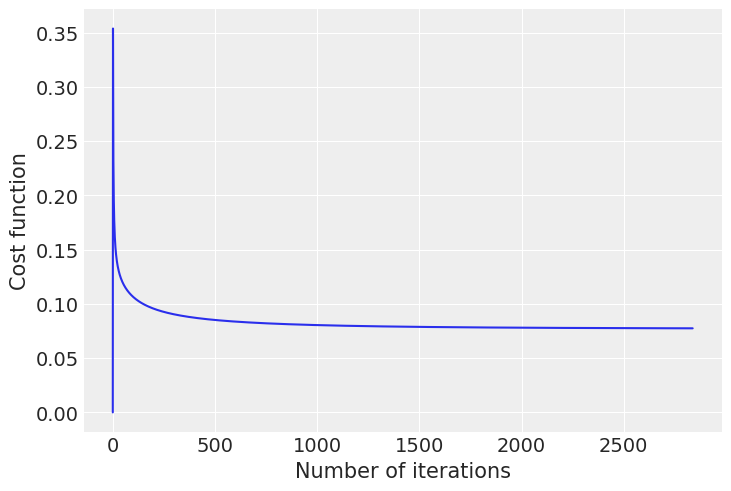

In [11]:
plot_cost(cost_list)

In [12]:
predict(X_train, y_train, weights, 'train', f'with epsilon={epsilon}')
predict(X_test, y_test, weights, 'test', f'with epsilon={epsilon}')

Accuracy for train set with epsilon=0.01: 97.183 %
Accuracy for test set with epsilon=0.01: 100.000 %


In [13]:
# Part 2
def gradient_descent_with_epochs(X, y, epochs, weights, learning_rate):
    m = len(y)
    cost_list = list()
    
    for _ in range(epochs):
        h = sigmoid(X @ weights)
        weights = weights - (learning_rate/m * (X.T @ (h - y)))
        cost_list.append(cost(X, weights, y))
    return cost_list, weights

In [17]:
epochs = 80
learning_rate = 0.02
weights = np.zeros((X_train.shape[1], 1))
cost_list, weights = gradient_descent_with_epochs(X_train, y_train, epochs, weights, learning_rate)

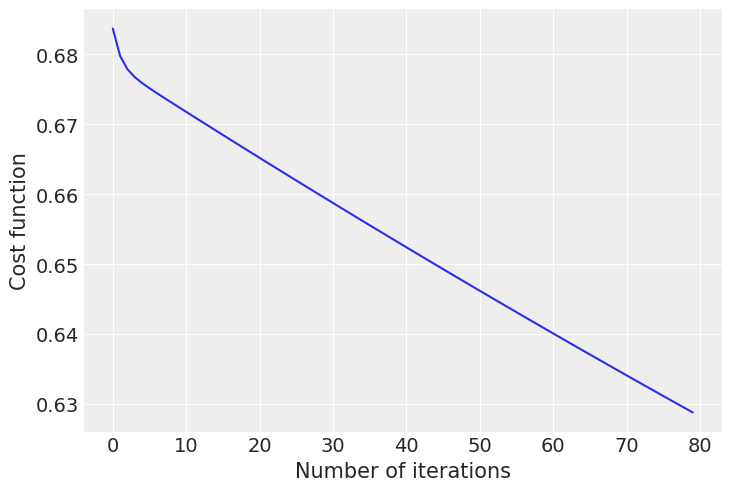

In [18]:
plot_cost(cost_list)

In [19]:
predict(X_train, y_train, weights, 'train', f'with {epochs} epochs')
predict(X_test, y_test, weights, 'test', f'with {epochs} epochs')

Accuracy for train set with 80 epochs: 54.930 %
Accuracy for test set with 80 epochs: 37.931 %
